# SocialMaps - Entity/Topic Extraction

The idea is to extend tags for improving search on page by using the given description text. 
We start first with the exploration of existing tags.

In [1]:
import json
import re
import pandas as pd


def load_json(file_name):
    try:
        with open(file_name, "r", encoding="utf-8") as file:
            data = json.load(file)
            print("Data loaded successfully from", file_name)
            return data
    except FileNotFoundError:
        print("Error: The file does not exist.")
        return None
    except json.JSONDecodeError:
        print("Error: The file is not a valid JSON.")
        return None

In [2]:
data = load_json("./socialmaps-items.json")
items = data["items"]
# print(json.dumps(items, indent=4))

df = pd.DataFrame.from_dict(items[0], orient="index").transpose()

for i in range(1, len(items)):
    temp = pd.DataFrame.from_dict(items[i], orient="index").transpose()
    df = pd.concat([df, temp])
df.reset_index(drop=True, inplace=True)

Data loaded successfully from ./socialmaps-items.json


## Tags Exploration

Build a subset of dataset of description and brief columns 

In [4]:
tags = pd.DataFrame()
for i in range(0, len(df)):
    temp = pd.get_dummies(df.tags[i]).any().to_frame().transpose()
    temp["title"] = df.loc[i].title
    tags = pd.concat([tags, temp])

In [5]:
tagslist = tags.columns.tolist()
notr = re.compile("^(?!o_ri)")
r = re.compile("^o_ri")
orlist = list(filter(r.match, tagslist))  # or_ri tokens  
notrlist = list(filter(notr.match, tagslist))  # other tokens

len(notrlist)


135

A huge part of the tags consisted of the tokens starting with with "or_ri", these are supposedly kind of shortcuts of the institution names. Besides the "or_ri" tokens, there are 135 unqiue tokens left. Look into composition of the tags. The tokens are based on the filters on the map. Here is a quick and dirty manual check of the token categories.

In [ ]:
language = [
    "german",
    "english",
    "russian",
    "arabic",
    "italian",
    "azerbaijani",
    "chinese",
    "french",
    "japanese",
    "korean",
    "nepali",
    "polish",
    "portuguese",
    "spanish",
    "thai",
    "turkish",
    "urdu",
    "vietnamese",
    "farsi",
    #'german_sign_langauge',
    "pashto",
    "serbian_croatian",
    "ukranian",
    "family_center",
    "victim_support",
    "kurdish",
    "bulgarian",
    "albanian",
    "romanian",
    "amharic",
    "aramaic",
    "armenian",
    "chechen",
    "tigrinya",
    "romani",
    "greek",
    "hebrew",
    "hungarian",
    "lithuanian",
    "tajiki",
    "turkmen",
    "uzbek",
    "hindu",
    "ukraine",
    "dutch",
    "interpreting_service",
    "suomi",
    "norwegian",
    "montenegrin",
    "macedonian",
    "slovene",
    "punjabi",
    "wolof",
    "dari",
    "swahili",
    "laz",
    # stadtteile
    "reinickendorf",
    "friedrichshain_kreuzberg",
    "steglitz_zehlendorf",
    "tempelhof_schoeneberg",
    "treptow_koepenik",
    "marzahn_hellersdorf",
    "neukoelln",
    "charlottenburg_wilmersdorf",
    "lichtenberg",
    "mitte",
    "spandau",
    "pankow",
    # kinder
    "daycare",
    "day_care",
    "daycare_children",
    "kindergarden",
    # youth
    "youth_facility",
    "young",
    # senior
    "senior_citizens",
    "senior_citizen_meeting",
    "retirement_home",
    # impairment
    "wheelchair",
    "deafblind",
    "sight_impaired",
    "speech_impairment",
    "german_sign_langauge",
    # addiction
    "addicted_persons",
    "addiction",
    "hearing_impaired",
    # education
    "education",
    "educational_center",
    "arts",
]
stadtteil = [
    "reinickendorf",
    "friedrichshain_kreuzberg",
    "steglitz_zehlendorf",
    "tempelhof_schoeneberg",
    "treptow_koepenik",
    "marzahn_hellersdorf",
    "neukoelln",
    "charlottenburg_wilmersdorf",
    "lichtenberg",
    "pankow",
    "mitte",
    "spandau",
]
daycare = ["daycare", "day_care", "daycare_children", "kindergarden"]
youth = ["youth_facility", "young"]
senior = [
    "senior_citizens",
    "senior_citizen_meeting",
    "retirement_home",
]
impairment = [
    "wheelchair",
    "deafblind",
    "hearing_impaired",
    "sight_impaired",
    "speech_impairment",
    "german_sign_langauge",
    "physical_disability",
    "bathroom_accessible",
]
addiction = [
    "addicted_persons",
    "addiction",
    "self_help",
]
education = [
    "education",
    "educational_center",
    "arts",
]
care = ["assisted_living", "care", "nursing_home", "hospice", "special_housing"]


[
    "disability_background",
    "workshop_disabilities",
    "mental_disability",
    "bathroom_accessible",
    "mental_disability_2",
    "physical_disability",
]
[
    "self_help_contact_point",
    "counseling",
    "counseling_center",
    "contact_point_ce",
    "self_help",
    "volunteer_work",
    "refugee_background",
    "migration_background",
    "emergency_shelter",
    "houseless",
]

[
    "meeting_center",
    "lobby" "neighborhood",
    "district_center",
    "cultural_center",
    "neighborhood_house",
    "multigenerational_house",
    "families",
    "group",
]

["assisted_living", "nursing_home", "hospice", "housing", "special_housing", "care"]

## TextRazor
TextRazorAPI provides great technique for entity extraction and topics tagging. 
It is connected to multiple large knowledge database like freebase, wikipedia and lots more. 
Using TextRazor for the tagging process: 

In [ ]:
desc = pd.DataFrame()
for i in range(0, len(df.description)):
    temp = pd.DataFrame.from_dict(df.description[i], orient="index").transpose()
    temp["id"] = df.id[i]
    temp["title"] = df.title[i]
    desc = pd.concat([desc, temp]).reset_index(drop=True)

desc.reset_index(inplace=True)
brief = pd.DataFrame()
for i in range(0, len(df.brief)):
    temp = pd.DataFrame.from_dict(df.brief[i], orient="index").transpose()
    temp["id"] = df.id[i]
    temp["title"] = df.title[i]
    brief = pd.concat([brief, temp]).reset_index(drop=True)

#desc.to_csv("desc.csv", index=False)

In [ ]:
desc = pd.read_csv("desc.csv")
desc.reset_index(inplace=True)
desc.info()  # .drop(columns = desc.columns[:2],inplace = True)

In [ ]:
import textrazor

textrazor.api_key = api_key
client = textrazor.TextRazor(extractors=["entities", "topics"])
client.set_classifiers(["textrazor_newscodes"])

In [ ]:
escore = pd.DataFrame()
tscore = pd.DataFrame()
cscore = pd.DataFrame()
# To Do 
for inst in range(0, len(df)-1):
    response = client.analyze(desc.de[inst])

    seen = pd.DataFrame(
        columns=[
            "id",
            "relevance_score",
            "confidence_score",
            "freebase_types",
            "desc_index",
        ]
    )
    entities = list(response.entities())
    entities.sort(key=lambda x: x.relevance_score, reverse=True)

    for entity in range(0, len(entities) - 1):
        seen.loc[entity, "desc_index"] = inst
        seen.loc[entity, "id"] = entities[entity].id
        seen.loc[entity, "relevance_score"] = entities[entity].relevance_score
        seen.loc[entity, "confidence_score"] = entities[entity].confidence_score
        seen.loc[entity, "freebase_types"] = entities[entity].freebase_types
        seen = seen.loc[seen.astype(str).drop_duplicates().index]
    escore = pd.concat([escore, seen])

    topicseen = pd.DataFrame(columns=["topic", "score", "desc_index"])
    topics = list(response.topics())
    topics.sort(key=lambda x: x.score, reverse=True)
    for topic in range(0, len(topics) - 1):
        topicseen.loc[topic, "desc_index"] = inst
        topicseen.loc[topic, "topic"] = topics[topic].label
        topicseen.loc[topic, "score"] = topics[topic].score
    tscore = pd.concat([tscore, topicseen])

    catseen = pd.DataFrame(columns=["category", "score", "desc_index"])
    categories = list(response.categories())
    categories.sort(key=lambda x: x.score, reverse=True)
    for category in range(0, len(categories) - 1):
        catseen.loc[category, "desc_index"] = inst
        catseen.loc[category, "category"] = categories[category].label
        catseen.loc[category, "score"] = categories[category].score
    cscore = pd.concat([cscore, catseen])

In [ ]:
float_col = ["relevance_score", "confidence_score"]
for col in float_col:
    escore[float_col] = escore[float_col].astype("float64")
    tscore["score"] = tscore["score"].astype("float64")
    cscore["score"] = cscore["score"].astype("float64")
    
#escore.to_csv("escore.csv", index=False)
#tscore.to_csv("tscore.csv", index=False)
#cscore.to_csv("cscore.csv", index=False)

## Data Consolidation

TextRazor extracts from the description texts relevant entities and topics prioritised by scores between [0,1], 1 means the entity or topic has the highest relevance in the corpus and 0 means zero relevance. 

In [6]:
escore = pd.read_csv("data/escore.csv")
tscore = pd.read_csv("data/tscore.csv")
df.reset_index(inplace = True)

# Select Top5 Most relevant topics for each description text
tscore_f = tscore.sort_values(["desc_index", "score"], ascending=[True, False])
tscore_f = tscore_f.groupby("desc_index").head(5)
tscore_f

,topic,score,desc_index
0,Commercial cleaning,1.0000,0
1,Hygiene,1.0000,0
2,Cleaning,1.0000,0
3,Home,1.0000,0
4,Cleaning industry,0.8598,0
...,...,...,...
195134,Health,1.0000,2286
195135,Health care,0.9794,2286
195136,Agriculture,0.8678,2286
195137,Psychotherapy,0.8670,2286


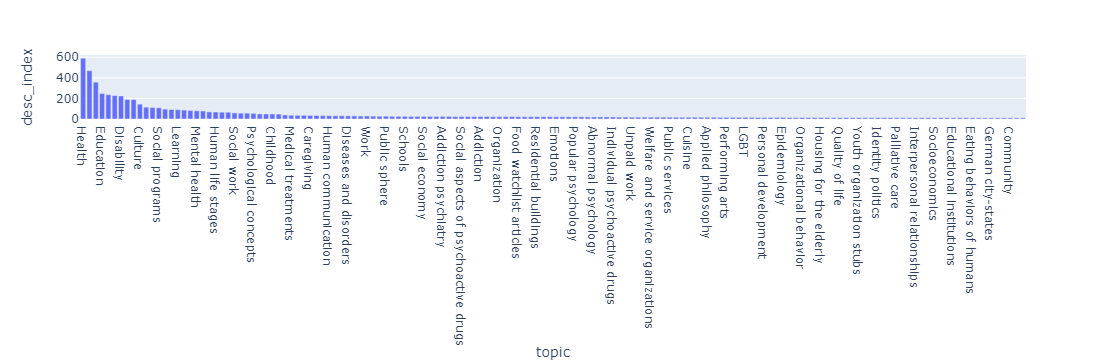

In [25]:
import plotly.express as px

pt = tscore_f.groupby("topic").desc_index.count().reset_index()
pt = pt.sort_values(by="desc_index", ascending=False)

t = px.bar(pt.query("desc_index >10"), x="topic", y="desc_index")
t.show()

In [26]:
# Top 5 most relevant entities 
escore_f = escore.sort_values(["desc_index", "relevance_score"], ascending=[True, False])
escore_f = escore_f.groupby("desc_index").head(5)
escore_f

,id,relevance_score,confidence_score,freebase_types,desc_index
0,Gebäudereiniger,0.4398,3.369,"['/organization/organization_sector', '/book/b...",0
1,Reinigung (Instandhaltung),0.3763,1.031,['/film/film_subject'],0
2,Führerschein,0.2773,2.368,[],0
3,Hygiene,0.2627,3.086,"['/business/product_category', '/medicine/medi...",0
4,Sanitärtechnik,0.2361,5.031,"['/organization/organization_sector', '/busine...",0
...,...,...,...,...,...
11368,Kunsttherapie,0.3407,4.276,['/business/industry'],2286
11369,Gesprächspsychotherapie,0.2428,2.818,[],2286
11370,Gemüse,0.2382,1.489,"['/book/book_subject', '/visual_art/art_subjec...",2286
11371,Lebensqualität,0.2285,2.109,"['/tv/tv_genre', '/media_common/media_genre']",2286


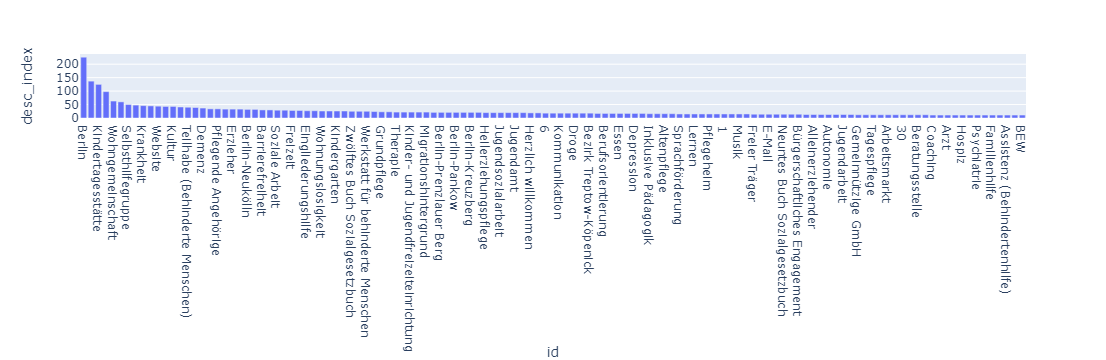

In [27]:
pe = escore_f.groupby("id").desc_index.count().reset_index()
pe = pe.sort_values(by="desc_index", ascending=False)

e = px.bar(pe.query("desc_index >10"), x="id", y="desc_index")
e.show()

In [9]:
topiclist = tscore_f.groupby("desc_index").topic.unique().reset_index()
entitylist = escore_f.groupby("desc_index").id.unique().reset_index().rename(columns = {"id":"entity"})

df_all = df.merge(topiclist, left_on = "index", right_on = "desc_index",how = "left").drop(columns = ["desc_index"])

#df_all.to_csv("data/socialmaps_data_tagstopics.csv", index = False)

Results are looking good, the search process on the website can be improved by extending the tags with these entities and topics.